<a href="https://colab.research.google.com/github/maggie20041027-svg/ECON3916-Statistical-Machine-Learning/blob/main/Assignment%201/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Spotify', 'Price_2016': 9.99, 'Price_2024': 11.99},
]

In [48]:
# Define the "Machine" (Function)
def calculate_inflation(Price_2016, Price_2024):
    return ((Price_2024 - Price_2016) / Price_2016) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Spotify: 20.02% Inflation


In [49]:
!pip install fredapi

import pandas as pd
from fredapi import Fred
fred = Fred(api_key='42636bb70ea4335cdcffbfbd82d831fe')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB') # Added Tuition
rent = fred.get_series('CUSR0000SEHA') # Added Rent
chipotle = fred.get_series('CUSR0000SEFV') # Added Chipotle
spotify = fred.get_series('CUSR0000SERA02') # Added Spotify

In [50]:
# Combine series into dataframe
df = pd.DataFrame({
    'Official_CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Chipotle': chipotle,
    'Spotify': spotify
})

In [51]:
# Drop any missing values
df = df.dropna()

In [52]:
# Apply formula to every row in the dataframe
Value_Index = (df/ df.loc['2016-01-01']) * 100

In [53]:
# Check
print('2016 Normalized Data:')
print(Value_Index.loc['2016-01-01'])
print('How much did things increase from 2016 to 2024?')
print(Value_Index.loc['2024-01-01'])

2016 Normalized Data:
Official_CPI    100.0
Tuition         100.0
Rent            100.0
Chipotle        100.0
Spotify         100.0
Name: 2016-01-01 00:00:00, dtype: float64
How much did things increase from 2016 to 2024?
Official_CPI    130.356151
Tuition         121.230948
Rent            141.087076
Chipotle        139.733726
Spotify         135.840791
Name: 2024-01-01 00:00:00, dtype: float64


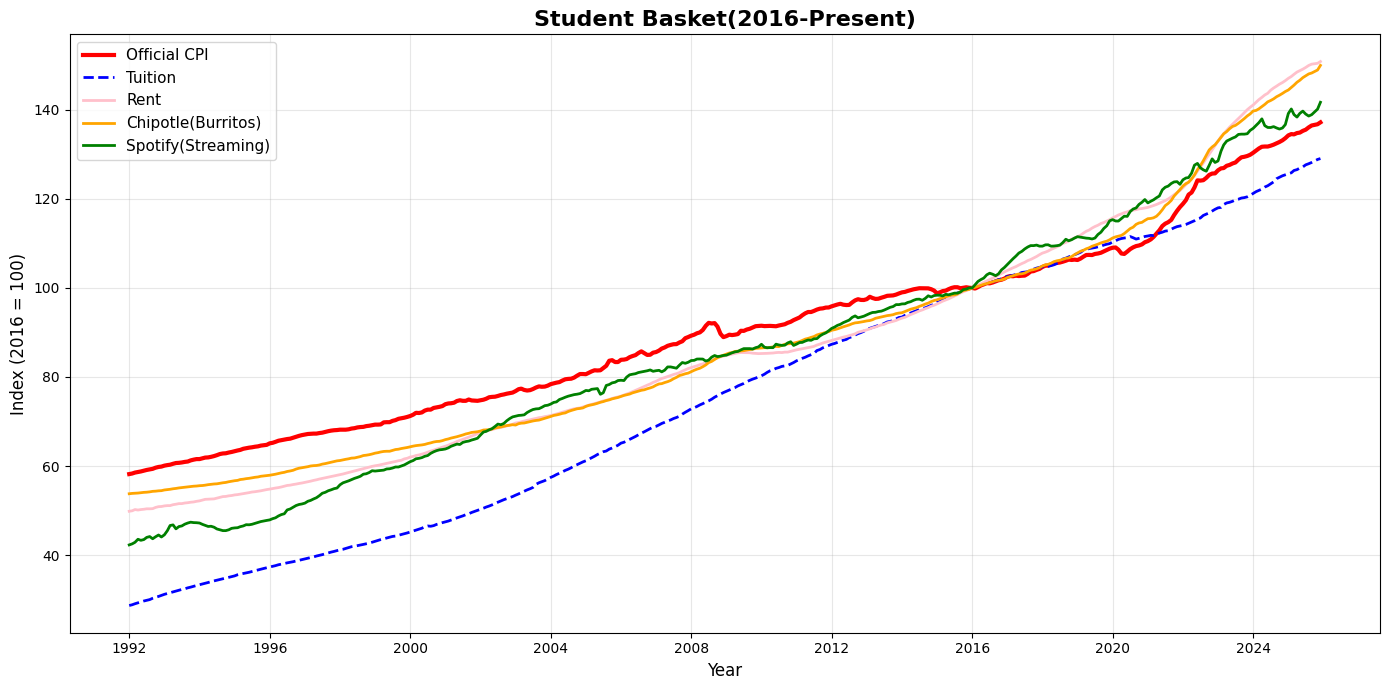

In [54]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot all the normalized series
ax.plot(Value_Index.index, Value_Index['Official_CPI'],
        linestyle='-',
        color='red',
        linewidth=3,
        label='Official CPI')

ax.plot(Value_Index.index, Value_Index['Tuition'],
        linestyle='--',
        color='blue',
        linewidth=2,
        label='Tuition')

ax.plot(Value_Index.index, Value_Index['Rent'],
        linestyle='-',
        color='pink',
        linewidth=2,
        label='Rent')

ax.plot(Value_Index.index, Value_Index['Chipotle'],
        linestyle='-',
        color='orange',
        linewidth=2,
        label='Chipotle(Burritos)')

ax.plot(Value_Index.index, Value_Index['Spotify'],
        linestyle='-',
        color='green',
        linewidth=2,
        label='Spotify(Streaming)')

# Add titles
ax.set_title('Student Basket(2016-Present)',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Index (2016 = 100)', fontsize=12)

# Add legend
ax.legend(loc='best', fontsize=11)

# Add grid
ax.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Display
plt.show()

In [55]:
# Assign weights
weights = {
    'Tuition': 0.5,
    'Rent': 0.4,
    'Chipotle': 0.05,
    'Spotify': 0.05
}

In [56]:
# Calculate new column
df['Student_SPI'] = (
    Value_Index['Tuition'] * weights['Tuition'] +
    Value_Index['Rent'] * weights['Rent'] +
    Value_Index['Chipotle'] * weights['Chipotle'] +
    Value_Index['Spotify'] * weights['Spotify']
)

# Check
print(df[['Student_SPI']].tail())

            Student_SPI
2025-07-01   137.969382
2025-08-01   138.272281
2025-09-01   138.558763
2025-11-01   139.065876
2025-12-01   139.453734


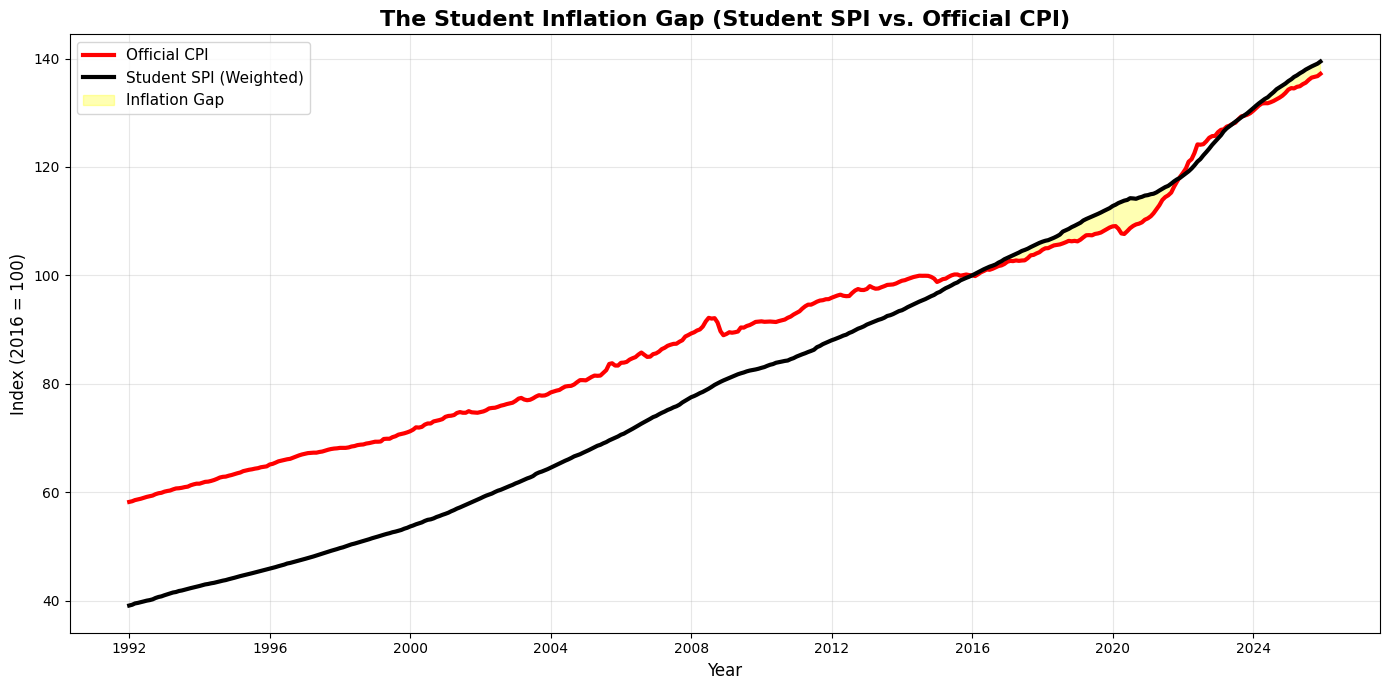

In [57]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the Official CPI
ax.plot(Value_Index.index, Value_Index['Official_CPI'],
        color='red',
        linewidth=3,
        label='Official CPI')

# Plot the Student SPI
ax.plot(df.index, df['Student_SPI'],
        color='black',
        linewidth=3,
        label='Student SPI (Weighted)')

# fill and highlight the gap
ax.fill_between(df.index,
                Value_Index['Official_CPI'],
                df['Student_SPI'],
                where=(df['Student_SPI'] >= Value_Index['Official_CPI']),
                color='yellow',
                alpha=0.3,
                label='Inflation Gap')

# Add titles
ax.set_title('The Student Inflation Gap (Student SPI vs. Official CPI)',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Index (2016 = 100)', fontsize=12)

# Add legend
ax.legend(loc='best', fontsize=11)

# Add grid
ax.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

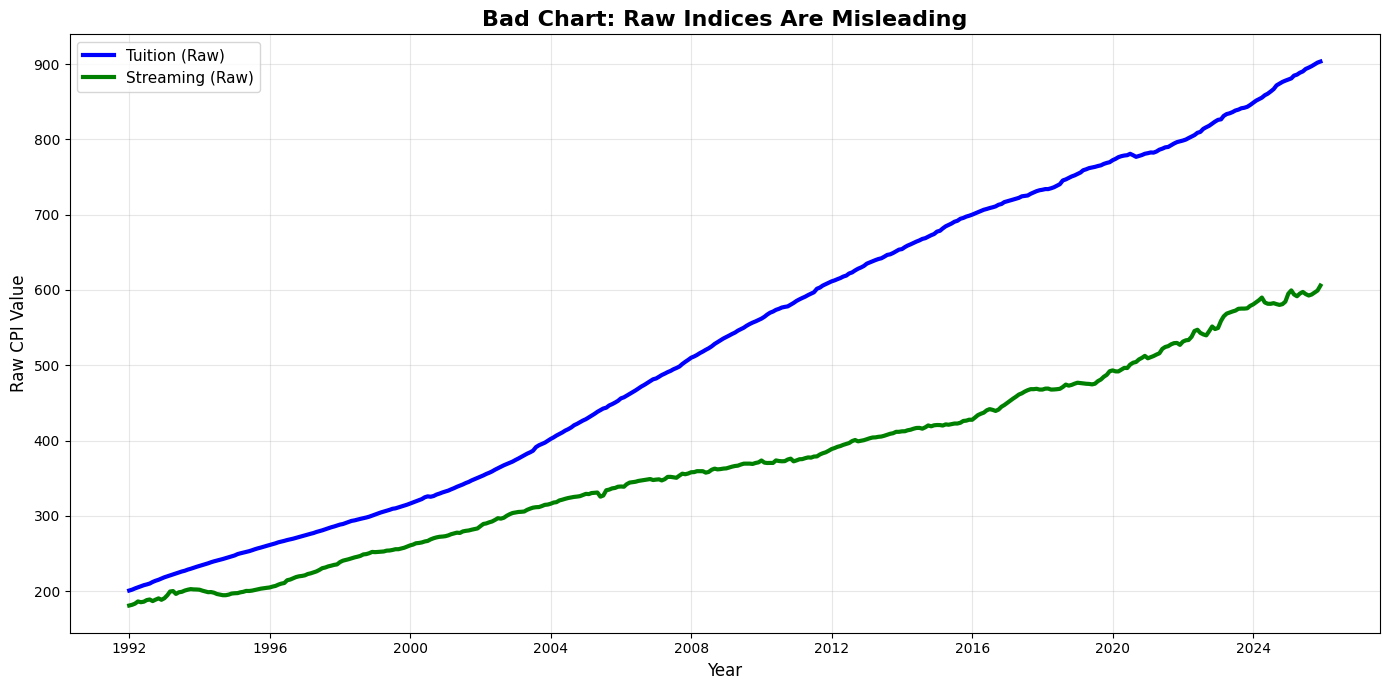

In [58]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the RAW tuition data
ax.plot(df.index, df['Tuition'],
        linestyle='-',
        color='blue',
        linewidth=3,
        label='Tuition (Raw)')

# Plot the RAW streaming data
ax.plot(df.index, df['Spotify'],
        linestyle='-',
        color='green',
        linewidth=3,
        label='Streaming (Raw)')

# Add titles
ax.set_title('Bad Chart: Raw Indices Are Misleading',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Raw CPI Value', fontsize=12)

# Add legend
ax.legend(loc='best', fontsize=11)

# Add grid for better readability
ax.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

Why comparing raw indices with different base years (e.g., 1982 vs 2002) is a "Data Crime.":

Observation:Tuition is around ~900+. Streaming is ~100, looks like Tuition is "huge" and Streaming is "tiny."

Comparing the two line, streaming line looks flat whereas the tuition line looks dominant, this was due to that tuition CPI is indexed to an earlier base year (1982 = 100), while Streaming CPI uses a later base year (2002 = 100). Because the indices are measured on different scales, plotting them together creates the illusion that tuition costs are “huge” and streaming costs are “negligible,” even though the numeric difference reflects indexing conventions rather than true relative price growth. Without normalization, visual comparisons across categories constitute a form of data misuse, also indicatin that comparing raw indices with different base years is meaningless.


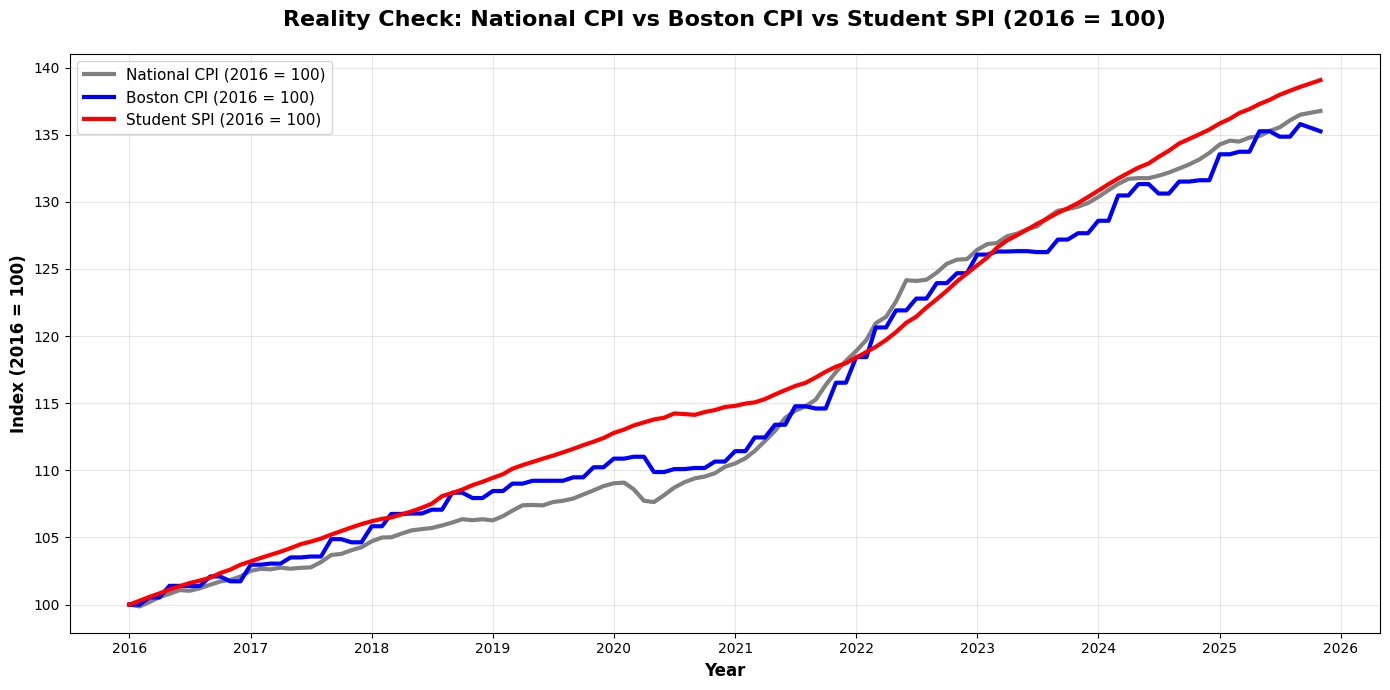

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------------
# Task 4.1 (FIXED): Boston vs USA vs You
# Normalize National CPI to 2016 = 100
# -----------------------------------

# 1. Filter your main df to 2016 onwards
df = df[df.index >= '2016-01-01']

# 2. Normalize National CPI so 2016-01-01 = 100
national_base = df.loc['2016-01-01', 'Official_CPI']
df['National_CPI'] = (df['Official_CPI'] / national_base) * 100

# 3. Combine the three series into one table
plot_df = pd.DataFrame({
    'National_CPI': df['National_CPI'],
    'Boston_CPI': boston_df['Boston_CPI'],
    'Student_SPI': df['Student_SPI']
})

# 4. Drop missing values so all three lines share the same dates
plot_df = plot_df.dropna()

# 5. Create figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# 6. Plot THREE lines (with required colors)
ax.plot(plot_df.index, plot_df['National_CPI'],
        color='grey',
        linewidth=3,
        label='National CPI (2016 = 100)')

ax.plot(plot_df.index, plot_df['Boston_CPI'],
        color='blue',
        linewidth=3,
        label='Boston CPI (2016 = 100)')

ax.plot(plot_df.index, plot_df['Student_SPI'],
        color='red',
        linewidth=3,
        label='Student SPI (2016 = 100)')

# 7. Add title and labels
ax.set_title('Reality Check: National CPI vs Boston CPI vs Student SPI (2016 = 100)',
             fontsize=16,
             fontweight='bold',
             pad=20)

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Index (2016 = 100)', fontsize=12, fontweight='bold')

# 8. Add legend + grid
ax.legend(loc='best', fontsize=11, frameon=True)
ax.grid(True, alpha=0.3)

# 9. Display plot
plt.tight_layout()
plt.show()
